In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the data
df = pd.read_excel("/kaggle/input/omnify-data-analytics/Omnify-Analyst-Intership-Task.xlsx")

# Preprocess 'Cost ($)' and 'Payment ($)' columns
df['Cost ($)'] = df['Cost ($)'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['Payment ($)'] = df['Payment ($)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Calculate the 'Returns %' column and handle missing values
df['Returns %'] = (df['Payment ($)'] / df['Cost ($)']) * 100
df['Returns %'].fillna(0, inplace=True)

## Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here

In [3]:
# Weekly report
weekly_report = df.resample('W', on='Week').agg({
    'Cost ($)': 'sum',
    'Payment ($)': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Returns %': 'mean'
}).reset_index()

# Monthly report
monthly_report = df.resample('M', on='Week').agg({
    'Cost ($)': 'sum',
    'Payment ($)': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Returns %': 'mean'
}).reset_index()

In [4]:
weekly_report

,Week,Cost ($),Payment ($),Clicks,Impressions,Leads,Prospects,Returns %
0,2021-01-31,154.79,2168.0,15,319,1,2,192.190347
1,2021-02-07,192.58,0.0,19,373,0,1,0.000000
2,2021-02-14,216.13,980.0,21,364,0,1,325.311203
3,2021-02-21,235.30,1788.0,35,671,0,2,339.272500
4,2021-02-28,190.90,0.0,22,478,0,1,0.000000
5,2021-03-07,141.40,980.0,14,407,0,1,85.888065
6,2021-03-14,258.20,0.0,34,503,3,1,0.000000
7,2021-03-21,184.36,0.0,22,468,1,0,0.000000
8,2021-03-28,308.73,2388.0,46,659,1,4,140.050437
9,2021-04-04,172.11,0.0,39,586,0,0,0.000000


In [5]:
monthly_report

,Week,Cost ($),Payment ($),Clicks,Impressions,Leads,Prospects,Returns %
0,2021-01-31,154.79,2168.0,15,319,1,2,192.190347
1,2021-02-28,834.91,2768.0,97,1886,0,5,159.741922
2,2021-03-31,1064.80,3368.0,155,2623,5,6,49.171476
3,2021-04-30,504.81,2388.0,89,1600,5,5,125.349067
4,2021-05-31,229.37,1188.0,31,537,1,3,62.390370


## Which is the most profitable channel

In [6]:
most_profitable_channel = df.groupby('Campaign')['Returns %'].mean().idxmax()

In [7]:
print("The most_profitable_channel:",most_profitable_channel)

The most_profitable_channel: EK_Generic_Tri-Tok_Reservation


## Which category/keyword is the most profitable

In [8]:
most_profitable_keyword = df.groupby('Search Keyword')['Returns %'].mean().idxmax()

In [9]:
print("The category keyword which is the most profitable is:",most_profitable_keyword)

The category keyword which is the most profitable is: reservation management system


## Look for insights by analyzing data points on time series graphs

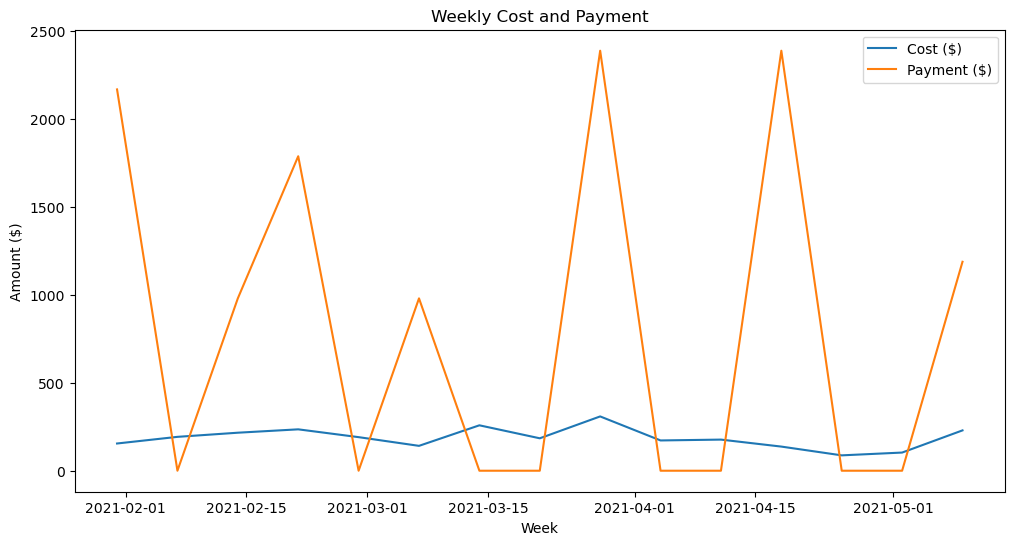

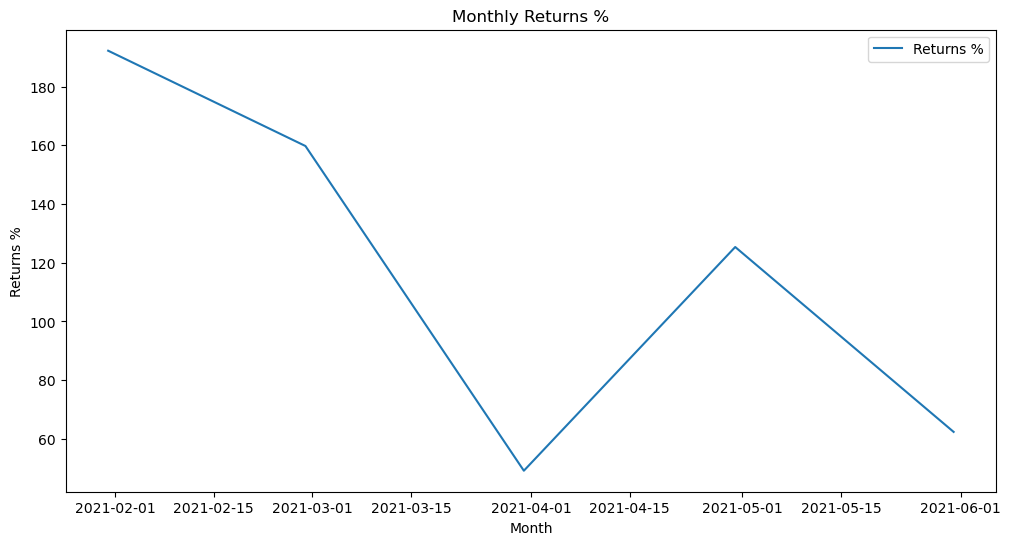

In [10]:
# Time series graph for weekly Cost and Payment
plt.figure(figsize=(12, 6))
plt.plot(weekly_report['Week'], weekly_report['Cost ($)'], label='Cost ($)')
plt.plot(weekly_report['Week'], weekly_report['Payment ($)'], label='Payment ($)')
plt.title('Weekly Cost and Payment')
plt.xlabel('Week')
plt.ylabel('Amount ($)')
plt.legend()
plt.show()

# Time series graph for monthly Returns %
plt.figure(figsize=(12, 6))
plt.plot(monthly_report['Week'], monthly_report['Returns %'], label='Returns %')
plt.title('Monthly Returns %')
plt.xlabel('Month')
plt.ylabel('Returns %')
plt.legend()
plt.show()

## Analyse the Impact of geography

In [11]:
geography_analysis = df.groupby('Country').agg({
    'Cost ($)': 'sum',
    'Payment ($)': 'sum',
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Leads': 'sum',
    'Prospects': 'sum',
    'Returns %': 'mean',
}).reset_index()

In [12]:
geography_analysis

,Country,Cost ($),Payment ($),Clicks,Impressions,Leads,Prospects,Returns %
0,USA,2788.68,11880.0,387,6965,12,21,109.011447
